In [1]:
#major packages
import glob
import os 
import pickle
import sys

import numpy as np
import pandas as pd
import xarray as xr


current_path=os.getcwd()
my_git_path=current_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
airborne_processing_module_path=current_path+"/../src/"
airborne_data_importer_path=major_work_path+"hamp_processing_py/"+\
                                "hamp_processing_python/" # This is also the major path where your data will be stored
processing_data_plotter_path=current_path+"/../plotting/"
plot_path=current_path+"/../plots/"
sys.path.insert(1,airborne_processing_module_path)
sys.path.insert(2,processing_data_plotter_path)

from measurement_instruments_ql import HALO_Devices, RADAR, HAMP
import config_handler
campaign="HALO_AC3"

cfg=config_handler.Configuration(major_path=airborne_data_importer_path)
#####
processing_cfg_name="unified_grid_cfg"  
processing_config_file=cfg.load_config_file(processing_cfg_name)
processing_config_file["Input"]["data_path"]=processing_config_file["Input"][\
                                                "campaign_path"]+"Flight_Data/"
processing_config_file["Input"]["device_data_path"]=processing_config_file["Input"][\
                                                "data_path"]+campaign+"/"
prcs_cfg_dict=dict(processing_config_file["Input"])
#prcs_cfg_dict

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\hamp_processing_python\notebooks/../..//../Work/GIT_Repository/hamp_processing_py/hamp_processing_python//unified_grid_cfg.ini


In [3]:
flight="RF18"
plot_radar=True

In [4]:
perform_raw_quicklooks=False
perform_error_identification=False
perform_processing=False
show_processed_results=True

HALO_Devices_cls=HALO_Devices(prcs_cfg_dict)
Radar_cls=RADAR(HALO_Devices_cls)
HAMP_cls=HAMP(HALO_Devices_cls)

In [5]:
radar_ds=Radar_cls.open_version_specific_processed_radar_data(version="2.6",for_calibrated_file=True)

Look for Radar data in  C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/
C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/HALO_HALO_AC3_radar_unified_*20220411_v2*.nc
Opened specific version: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc\HALO_HALO_AC3_radar_unified_RF17_20220411_v2.6.nc


C:\Users\u300737\AppData\Local\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [6]:
import halodataplot
Quick_Plotter=halodataplot.Quicklook_Plotter(prcs_cfg_dict)
Radar_Quicklook=halodataplot.Radar_Quicklook(prcs_cfg_dict)
Radiometer_Quicklook=halodataplot.Radiometer_Quicklook(prcs_cfg_dict)

Typhon module cannot be loaded


In [7]:
#prcs_cfg_dict

Plotting HAMP Cloud Radar (processed and calibrated)
dBZ plotted
LDR plotted
unified_radar_dbz_ldr_quicklook_RF18_20220411.png
Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\hamp_processing_python\notebooks/../plots//unified_dataset/unified_radar_dbz_ldr_quicklook_RF18_20220411.png


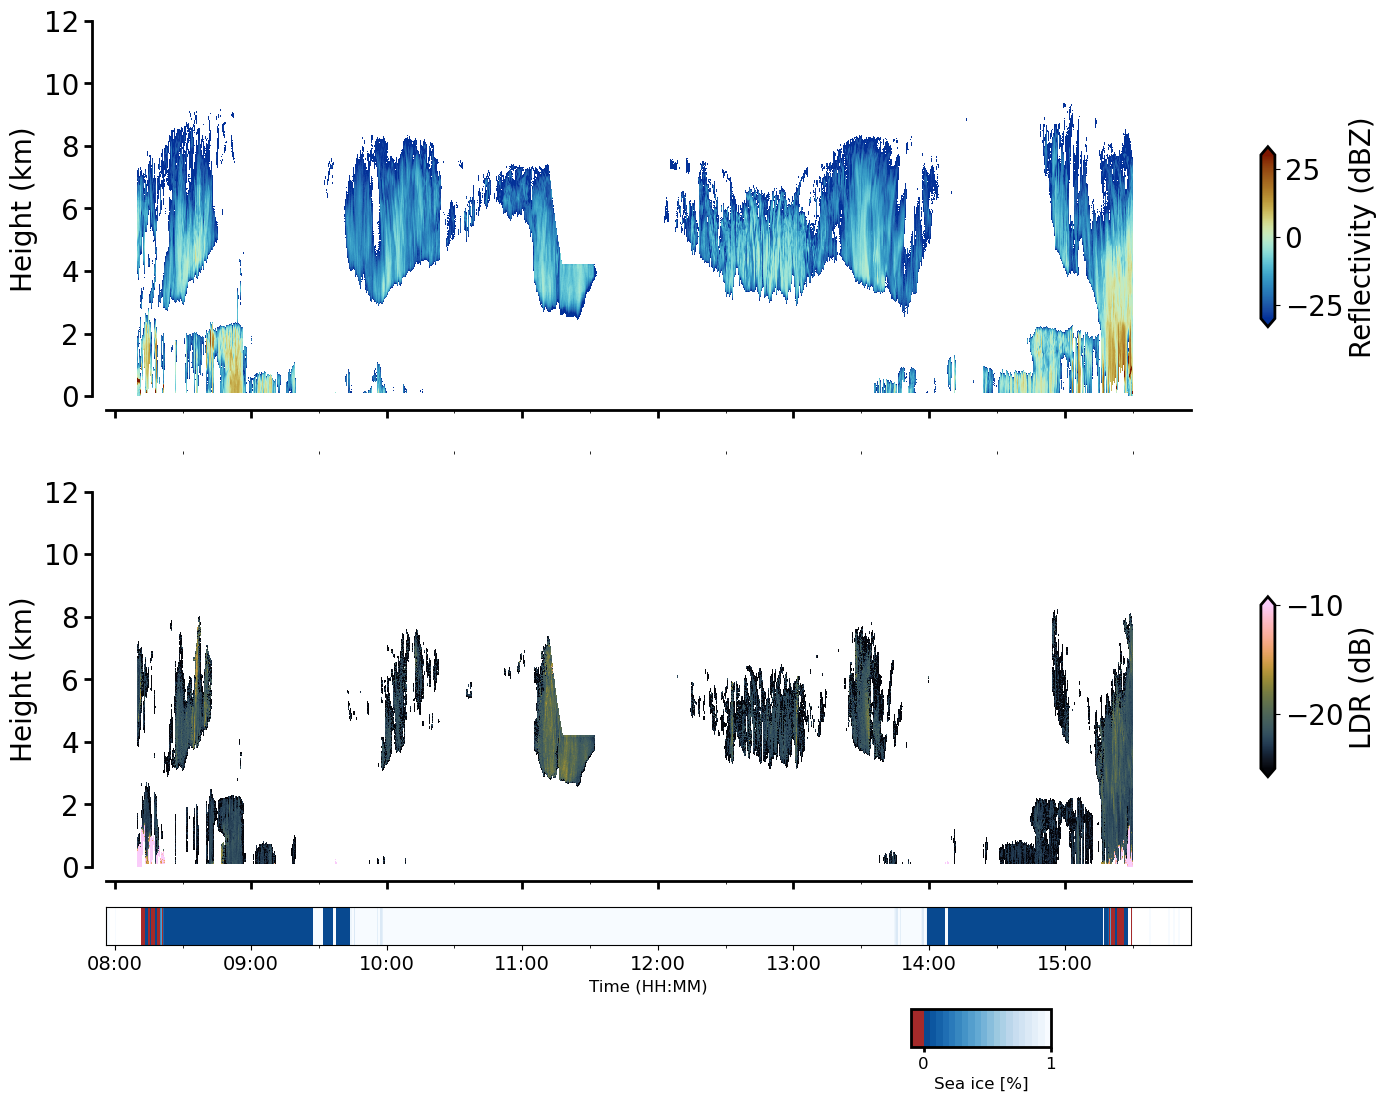

In [8]:
if plot_radar:
    Radar_Quicklook.processed_radar=radar_ds
    #radar_ds
    Radar_Quicklook.unified_radar_quicklook(flight,plot_path,calibrated_radar=True)
    #radar_ds

## Radiometer

In [9]:
HAMP_cls.open_processed_hamp_data(open_calibrated=True)
hamp_ds=HAMP_cls.calib_processed_hamp_ds
#hamp_ds

C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\/Work/GIT_Repository/hamp_processing_py/hamp_processing_python//Flight_Data/HALO_AC3/all_nc/HALO_HALO_AC3_radiometer_unified_*20220411_v2*.nc


In [10]:
Radiometer_Quicklook.radiometer_tb_dict=hamp_ds

TBKVDF: Index(['22.24', '23.04', '23.84', '25.44', '26.24', '27.84', '31.4', '50.3',
       '51.76', '52.8', '53.75', '54.94', '56.66', '58.0'],
      dtype='object')
unified_radiometer_tb_quicklook_RF18_20220411.png
Figure saved as: C:\Users\u300737\Desktop\Desktop_alter_Rechner\PhD_UHH_WIMI\my_GIT\hamp_processing_python\notebooks/../plots//unified_dataset/unified_radiometer_tb_quicklook_RF18_20220411.png


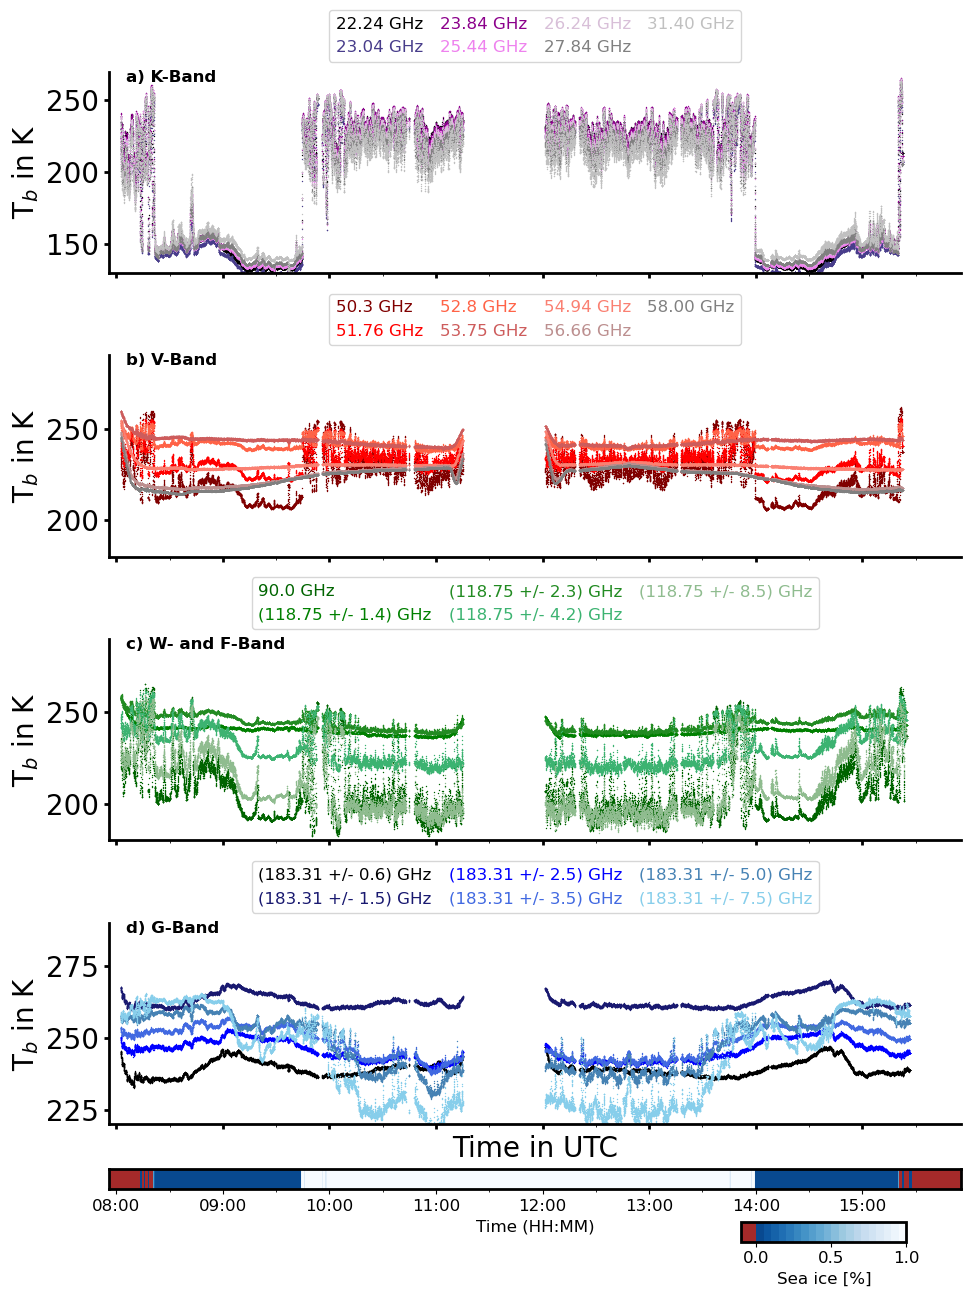

In [11]:
Radiometer_Quicklook.unified_radiometer_plot(flight,plot_path,calibrated=True)